# Advanced Machine Learning - Project 1
## Caenorhabditis elegans roundworms exploration

- Eduardo Carneiro - 62515
- Til Dietrich - 62928


## Todo List
- Classification (KNN with different metrics, Different data representations like PAA and SAX into KNN, Summarization methods into KNN, etc) (maybe search for other classifiers other than KNN for time series)
- 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.metrics import accuracy_score, f1_score
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

from tslearn.piecewise import PiecewiseAggregateApproximation, SymbolicAggregateApproximation


In [109]:
df_train = pd.read_csv("../worms_trainset.csv")
y_train = df_train.iloc[:,0]
df_train.drop(columns=[ df_train.columns[0] ], inplace=True)

df_test = pd.read_csv("../worms_testset.csv")
y_test = df_test.iloc[:,0]
df_test.drop(columns=[ df_test.columns[0] ], inplace=True)

NaN Count: 0
(180, 901)
(76, 901)


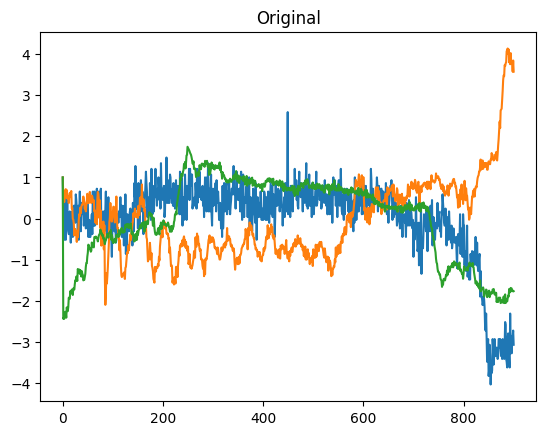

(3, 901)


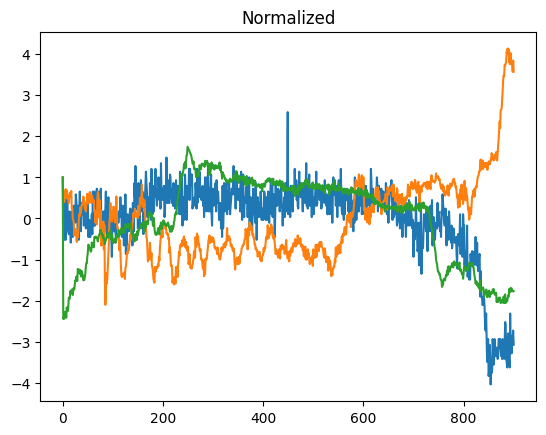

In [11]:
print(f'NaN Count: {df_train.isnull().sum().sum()}') # How many NaNs are there?

# WE DO NOT NEED TO NORMALIZE THE DATA!!!! ALREADY NORMALIZED!!! (it could be seen from the plots, but this was just to be sure)
print( df_train.shape)
print( df_test.shape)

n = 3

for i in range(n):
    plt.plot( range(0,901),df_train.iloc[i,:])
plt.title("Original"	)
plt.show()

from tslearn.preprocessing import TimeSeriesScalerMeanVariance

X_train_normalized = TimeSeriesScalerMeanVariance().fit_transform(df_train.iloc[:n,:]).reshape(n,-1)

print(X_train_normalized.shape)
for i in range(n):
    plt.plot( range(0,901),X_train_normalized[i,:])
plt.title("Normalized")
plt.show()


# Noise Removal
## Questions
- Is there noise that we should remove?
- If yes, should we use moving average?
    - If yes, what window size should we use?

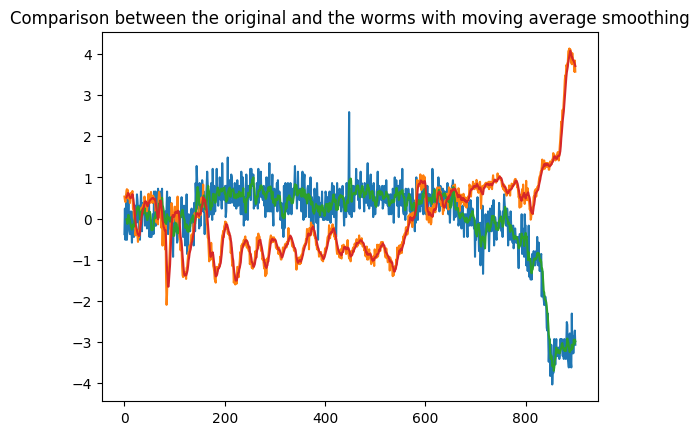

In [25]:
n = 2
window_size = 5

plt.title("Comparison between the original and the worms with moving average smoothing")
for i in range(n):
    plt.plot( range(0,900),df_train.iloc[i,:])

# Moving-Average Smoothing
mov_avg = [df_train.iloc[i,1:].rolling(window_size).mean() for i in range( df_train.iloc[:n,:].shape[0] )]

for i in range(n):
    plt.plot( range(0,900),mov_avg[i] )
plt.show()


# Representation
- Should we change the original representation for another one?
    - If yes, which one should we use? (maybe DFT makes sense here, since the worms behave like waves???? idk)

### PAA

In [103]:
paa_representation = PiecewiseAggregateApproximation(n_segments=750)

X_train_paa = paa_representation.fit_transform( np.reshape(df_train.iloc[0,:],(1,-1)) ).reshape(1,-1)
X_test_paa = paa_representation.fit_transform(df_test)

# knn = KNeighborsTimeSeriesClassifier(n_neighbors=1, metric='euclidean')
# knn.fit( X_train_paa[0,1:],(1,-1), y_train)

# y_pred = knn.predict(X_test_paa)
# print(accuracy_score(y_test, y_pred))


d:\OneDrive - Universidade de Coimbra\Mestrado\Files\1Semestre\AAA\P\P1\venv_AML\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn(
d:\OneDrive - Universidade de Coimbra\Mestrado\Files\1Semestre\AAA\P\P1\venv_AML\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 76 1-dimensional timeseries
  warnings.warn(


# Classification

- Just some tests to see how the KNN performs on the original data with some metrics

In [110]:
for metric in ["euclidean", "dtw"]:
    for neigh_num in [1,3,5,7,9]:

        knn = KNeighborsTimeSeriesClassifier(n_neighbors= neigh_num, metric= metric)

        knn.fit(df_train, y_train)

        y_pred = knn.predict(df_test)
        print(f"{metric}:knn{neigh_num}|{accuracy_score(y_test, y_pred)}")


for n_seg in [250, 350, 450, 550, 650]:
    for alph_size in [10, 20, 30, 40]:
        for neigh_num in [1,3,5]:
            knn = KNeighborsTimeSeriesClassifier(n_neighbors= neigh_num, metric= "sax", metric_params={"n_segments": n_seg, "alphabet_size_avg": alph_size})
            knn.fit(df_train, y_train)

            y_pred = knn.predict(df_test)
            print(f"sax:knn{neigh_num}|n_seg:{n_seg}:alph_size:{alph_size}|{accuracy_score(y_test, y_pred)}")

euclidean:knn1|0.6052631578947368
euclidean:knn3|0.5394736842105263
euclidean:knn5|0.5
euclidean:knn7|0.5131578947368421
euclidean:knn9|0.5526315789473685
dtw:knn1|0.618421052631579
dtw:knn3|0.5526315789473685
dtw:knn5|0.5394736842105263
dtw:knn7|0.5657894736842105
dtw:knn9|0.5921052631578947
sax:knn1|n_seg:250:alph_size:10|0.6052631578947368
sax:knn3|n_seg:250:alph_size:10|0.5394736842105263
sax:knn5|n_seg:250:alph_size:10|0.5394736842105263
sax:knn1|n_seg:250:alph_size:20|0.5526315789473685
sax:knn3|n_seg:250:alph_size:20|0.5131578947368421
sax:knn5|n_seg:250:alph_size:20|0.5657894736842105
sax:knn1|n_seg:250:alph_size:30|0.5526315789473685
sax:knn3|n_seg:250:alph_size:30|0.5394736842105263
sax:knn5|n_seg:250:alph_size:30|0.5657894736842105
sax:knn1|n_seg:250:alph_size:40|0.5526315789473685
sax:knn3|n_seg:250:alph_size:40|0.5263157894736842
sax:knn5|n_seg:250:alph_size:40|0.5657894736842105
sax:knn1|n_seg:350:alph_size:10|0.6052631578947368
sax:knn3|n_seg:350:alph_size:10|0.565789473